In [1]:
import spacy

# Download the English language model
spacy.cli.download("en_core_web_sm")

# Load the downloaded model
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
!pip install yellowbrick
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=039005e70939d4e0df8df4cdf8cbe8fbc73696f1a76a4db677e6a7e204e99b25
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [4]:
import wikipedia
# Search for a keyword
wiki_obj = wikipedia.page("Rate of Diabetes in the United State")
# Get the content of Wikipedia
wiki_con = wiki_obj.content
wiki_con

'The following is a glossary of diabetes which explains terms connected with diabetes.\n\n\n== A ==\nAcanthosis nigricans A brown to black, poorly defined, velvety hyperpigmentation of the skin, usually present in the posterior and lateral folds of the neck, the axilla, groin, umbilicus, and other areas.  This occurs due to insulin spillover (from excessive production due to obesity or insulin resistance) into the skin which results in abnormal growth being observed.  The most common cause would be insulin resistance, usually from type 2 diabetes mellitus.\nACE inhibitor Angiotensin conversion enzyme. A class of drugs used to decrease hypertension, mainly by interfering with the renin kidney—blood pressure control cycle. An example is Ramparil. (See ARB).\nAdult-onset diabetes One of the former terms for Type 2 diabetes. See: Type 2 diabetes mellitus.\nAcetohexamide A pill taken to lower the level of glucose (sugar) in the blood. People with Type 2 diabetes may take these pills. See al

In [5]:
# Set the language of Wikipedia (default is English)
wikipedia.set_lang("en")

# Retrieve the content of the glossary page
page = wikipedia.page("Glossary_of_diabetes")
glossary_content = page.content
glossary_content

'The following is a glossary of diabetes which explains terms connected with diabetes.\n\n\n== A ==\nAcanthosis nigricans A brown to black, poorly defined, velvety hyperpigmentation of the skin, usually present in the posterior and lateral folds of the neck, the axilla, groin, umbilicus, and other areas.  This occurs due to insulin spillover (from excessive production due to obesity or insulin resistance) into the skin which results in abnormal growth being observed.  The most common cause would be insulin resistance, usually from type 2 diabetes mellitus.\nACE inhibitor Angiotensin conversion enzyme. A class of drugs used to decrease hypertension, mainly by interfering with the renin kidney—blood pressure control cycle. An example is Ramparil. (See ARB).\nAdult-onset diabetes One of the former terms for Type 2 diabetes. See: Type 2 diabetes mellitus.\nAcetohexamide A pill taken to lower the level of glucose (sugar) in the blood. People with Type 2 diabetes may take these pills. See al

In [6]:
url = wiki_obj.url
url

'https://en.wikipedia.org/wiki/Glossary_of_diabetes'

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
import wikipedia
import pandas as pd
!pip install tabulate
from tabulate import tabulate
#Preproccessed Data
# Set the Wikipedia page title containing the glossary on diabetes
glossary_content = "Glossary of diabetes"

# Get the content of the Wikipedia page
page_content = wikipedia.page(glossary_content).content

# Split the content into lines
lines = page_content.split('\n')

# Initialize lists to store terms and their explanations
terms = []
explanations = []

# Iterate through each line to extract terms and their explanations
for line in lines:
    # Check if the line contains a term and its explanation
    if ':' in line:
        term, explanation = line.split(':', 1)
        terms.append(term.strip())
        explanations.append(explanation.strip())

# Create a DataFrame to store the terms and their explanations
df = pd.DataFrame({'term':terms,'explanation':explanations})

# Display the DataFrame in a table format
print(tabulate(df, headers='keys', tablefmt='grid', colalign=('left', 'left'), maxcolwidths=[20, 80]))




+----+----------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | term                                                                             | explanation                                                                                                                                                                                                                                                                                                              |
+====+==================================================================================+=====================================================================================================

In [10]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


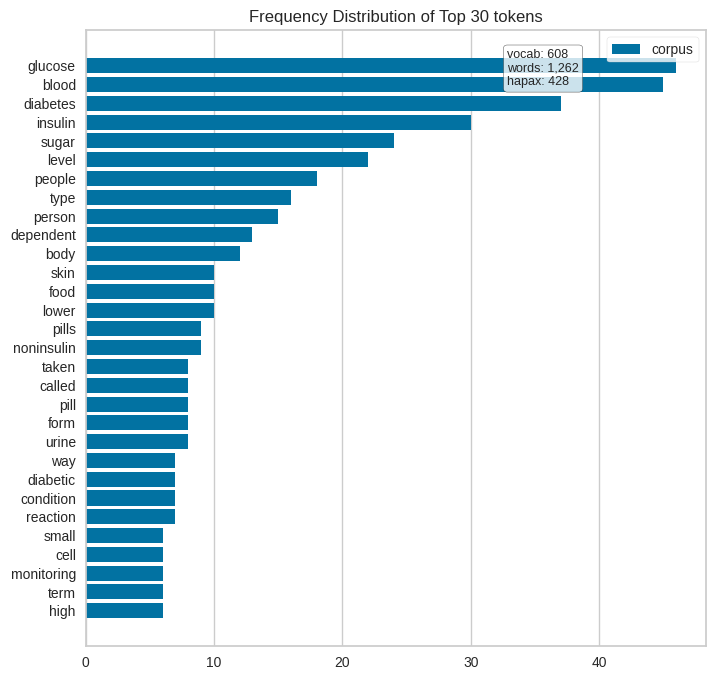

<Axes: title={'center': 'Frequency Distribution of Top 30 tokens'}>

In [11]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

vect = CountVectorizer(max_features=10000, max_df=.60,
                       stop_words="english")
X = vect.fit_transform(df.term)

# Get all features (tokens)
features = vect.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(X)
visualizer.poof()

In [12]:
X.shape

(88, 608)

In [13]:
#Use LatentDirichletAllocation( ) function for LDA topic mining.
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

In [14]:
#document_topics variable shows the probability that each document belongs to one of the captured topics
document_topics.shape

(88, 5)

In [15]:
document_topics

array([[0.88519225, 0.02860645, 0.0287013 , 0.02888075, 0.02861925],
       [0.01559582, 0.01547049, 0.01556148, 0.93786936, 0.01550284],
       [0.01283012, 0.01265523, 0.0127992 , 0.9488747 , 0.01284075],
       [0.10001656, 0.1000237 , 0.59992466, 0.10001285, 0.10002223],
       [0.05000551, 0.05000801, 0.05094592, 0.79890401, 0.05013654],
       [0.01848194, 0.92684917, 0.01819827, 0.01821553, 0.01825509],
       [0.03499699, 0.03334238, 0.03489243, 0.86305383, 0.03371437],
       [0.06815453, 0.06667949, 0.06720487, 0.73105382, 0.0669073 ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.00304363, 0.00305697, 0.00303093, 0.98783282, 0.00303566],
       [0.03438752, 0.03333822, 0.86445679, 0.0340201 , 0.03379737],
       [0.00657379, 0.32718029, 0.00649481, 0.65325566, 0.00649546],
       [0.03360821, 0.86626097, 0.03335572, 0.03334849, 0.03342662],
       [0.00488577, 0.00483922, 0.004857  , 0.98059024, 0.00482778],
       [0.98505608, 0.00371884, 0.

In [16]:
# let's see the result
lda.components_

array([[1.19999796, 1.19999796, 1.1999941 , ..., 1.19999796, 1.19999746,
        1.20045712],
       [0.20000059, 0.20000059, 0.2000017 , ..., 0.20000059, 0.20000075,
        0.20000514],
       [0.20000057, 0.20000057, 0.20000164, ..., 0.20000057, 0.2000007 ,
        0.20000521],
       [0.20000033, 0.20000033, 0.20000094, ..., 0.20000033, 0.2000004 ,
        1.19952738],
       [0.20000055, 0.20000055, 0.20000162, ..., 0.20000055, 0.2000007 ,
        0.20000515]])

In [17]:
lda.components_.shape

(5, 608)

In [18]:
#Let's see the terms(tokens) with highest weight in each topic
# Set n to your desired number of tokens
n = 8
# Get features (tokens) from CountVectorizer
feature_names = np.array(vect.get_feature_names_out())
# Find top n tokens
topics = dict()
for idx, component in enumerate(lda.components_):
    top_n_indices = component.argsort()[:-(n + 1): -1]
    topic_tokens = [feature_names[i] for i in top_n_indices]
    topics[idx] = topic_tokens

topics

{0: ['insulin',
  'diabetes',
  'glucose',
  'blood',
  'dependent',
  'type',
  'reaction',
  'allergy'],
 1: ['insulin',
  'urine',
  'glucose',
  'blood',
  'small',
  'needle',
  'skin',
  'level'],
 2: ['blood',
  'glucose',
  'sugar',
  'kidney',
  'diabetes',
  'monitoring',
  'way',
  'iron'],
 3: ['diabetes',
  'blood',
  'people',
  'glucose',
  'sugar',
  'level',
  'lower',
  'pills'],
 4: ['blood',
  'glucose',
  'level',
  'insulin',
  'body',
  'shock',
  'damage',
  'person']}

In [19]:
#check and see the documents with a high probability assigned to each topic
topic_0 = np.argsort(document_topics[:, 0])[::-1]
# print the five documents where the topic is most important
for index in topic_0[:5]:
    # pshow first two sentences
    print(df.term[index],"\n------------\n")

Insulin reaction Too low a level of blood glucose (i.e., 'sugar') in the blood; also called hypoglycemia. This occurs when a person with diabetes has injected too much insulin, eaten too little food, or exercised without compensating for the increased glucose uptake caused by exercise. The person may feel hungry, nauseated, weak, nervous, shaky, confused, and sweaty. Eating small amounts of glucose converting sugar or starch (glucose, sucrose (1/2 glucose) or starch (all glucose)), sweet juice with glucose or sucrose, or food with such sugar will usually help the person feel better within 10–15 minutes. Fat or protein in the food or drink will delay absorption and should be avoided. So a glucose tablet is ideal, a candy bar or pastry is not (both contain fat in addition to starch and usually sugar). Orange juice works, but less well than intended, as its main carbohydrate is fructose. See also 
------------

Insulin allergy This occurs when a person's body has an allergic or bad reacti

In [20]:
# Let's increase the number of topics to 20
n_topics = 30
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch",
                                max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

# Sort the tokens and get top 2 tokens in each topic
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

In [ ]:
document_topics[0]

In [21]:
topic_names

[' 0 cells pancreas',
 ' 1 edema macular',
 ' 2 kidney disease',
 ' 3 people diabetes',
 ' 4 blood glucose',
 ' 5 nonketotic coma',
 ' 6 syndrome metabolic',
 ' 7 glucose urine',
 ' 8 works follow',
 ' 9 type beta',
 '10 food lists',
 '11 glucose sugar',
 '12 formed glycogenesis',
 '13 works follow',
 '14 iron body',
 '15 skin callus',
 '16 insulin small',
 '17 hyperlipemia genetic',
 '18 blood glucose',
 '19 atherosclerosis tolerance',
 '20 term used',
 '21 blood glucose',
 '22 milk enzyme',
 '23 diabetes type',
 '24 works follow',
 '25 diabetic neuropathy',
 '26 fat subcutaneous',
 '27 fats type',
 '28 condition diabetes',
 '29 insulin allergy']

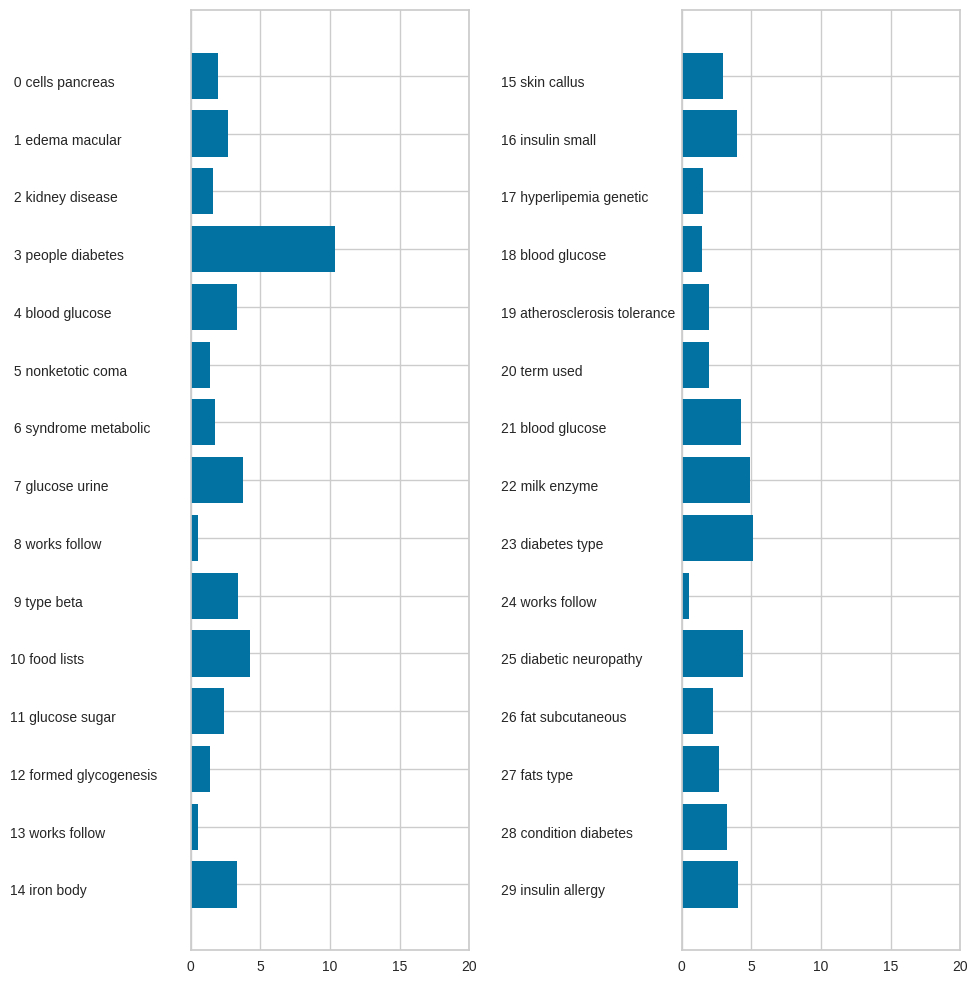

In [22]:
# Let's visualize the result
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# two column bar chart:
for col in [0, 1]:
    start = col*int(n_topics/2)
    end=(col+1)*int(n_topics/2)
    ax[col].barh(np.arange(int(n_topics/2)), np.sum(document_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(int(n_topics/2)))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 20)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()